In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/istanbul-municipality-traffic-density-data-2024aug/traffic_density__202408.csv


In [2]:

df=pd.read_csv("/kaggle/input/istanbul-municipality-traffic-density-data-2024aug/traffic_density__202408.csv")

In [3]:
df.head()

,DATE_TIME,LONGITUDE,LATITUDE,GEOHASH,MINIMUM_SPEED,MAXIMUM_SPEED,AVERAGE_SPEED,NUMBER_OF_VEHICLES
0,2024-08-01 00:00:00,28.427124,41.058655,sxk1wf,61,126,90,50
1,2024-08-01 00:00:00,28.591919,41.102600,sxk3fd,33,154,89,58
2,2024-08-01 00:00:00,28.339233,41.097107,sxk1uc,65,141,95,38
3,2024-08-01 00:00:00,28.229370,41.130066,sxk1fr,51,129,84,38
4,2024-08-01 00:00:00,28.493042,41.119080,sxk3bm,30,113,67,23


# TOP Regions in Turkey with Highest Number of Vehicles

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import folium

In [5]:
df1 = df.groupby(['LONGITUDE','LATITUDE']).agg({"NUMBER_OF_VEHICLES":"sum"}).reset_index().sort_values(by='NUMBER_OF_VEHICLES',ascending=False)

In [6]:
my_map = folium.Map(location=[df1.iloc[0]['LATITUDE'], df1.iloc[0]['LONGITUDE']])
for index,record in df1.reset_index().head(20).iterrows():
    

    folium.Marker([record["LATITUDE"], record['LONGITUDE']], popup=index ).add_to(my_map)

   
    

my_map


## REGIONS IN ISTANBUL WITH HIGH  DRIVING SPEED 

In [7]:
df1 = df.groupby(['LONGITUDE','LATITUDE']).agg({"AVERAGE_SPEED":"mean"}).reset_index().sort_values(by='AVERAGE_SPEED',ascending=False)
my_map = folium.Map(location=[df1.iloc[0]['LATITUDE'], df1.iloc[0]['LONGITUDE']])
for index,record in df1.reset_index().head(20).iterrows():
    

    folium.Marker([record["LATITUDE"], record['LONGITUDE']], popup=index ).add_to(my_map)

   
    

my_map


## TOP 5 REGIONS IN ISTANBUL WITH SLOWEST DRIVING SPEED 

In [8]:

df1 = df.groupby(['LONGITUDE','LATITUDE']).agg({"MINIMUM_SPEED":"mean"}).reset_index().sort_values(by='MINIMUM_SPEED')
my_map = folium.Map(location=[df1.iloc[0]['LATITUDE'], df1.iloc[0]['LONGITUDE']])
for index,record in df1.reset_index().head(10).iterrows():
    

    folium.Marker([record["LATITUDE"], record['LONGITUDE']], popup=record['MINIMUM_SPEED'] ).add_to(my_map)

   
    

my_map


In [9]:
df['DATE_TIME']=pd.to_datetime(df['DATE_TIME'])

In [10]:
df.columns

Index(['DATE_TIME', 'LONGITUDE', 'LATITUDE', 'GEOHASH', 'MINIMUM_SPEED',
       'MAXIMUM_SPEED', 'AVERAGE_SPEED', 'NUMBER_OF_VEHICLES'],
      dtype='object')

# Clustering places based on driving speeds using K-Means

We will start with 4 clusters, then will find the optimum number of clusters using Elbow Method

In [11]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)


In [12]:
df.columns

Index(['DATE_TIME', 'LONGITUDE', 'LATITUDE', 'GEOHASH', 'MINIMUM_SPEED',
       'MAXIMUM_SPEED', 'AVERAGE_SPEED', 'NUMBER_OF_VEHICLES'],
      dtype='object')

In [13]:
kmeans.fit(df.drop(columns=["DATE_TIME","GEOHASH"],axis=1))

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

In [14]:
kmeans.inertia_

6957964656.778474

In [15]:
inertia=[]
for i in range(1,5):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df.drop(columns=["DATE_TIME","GEOHASH"],axis=1))
    inertia.append(kmeans.inertia_)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: >

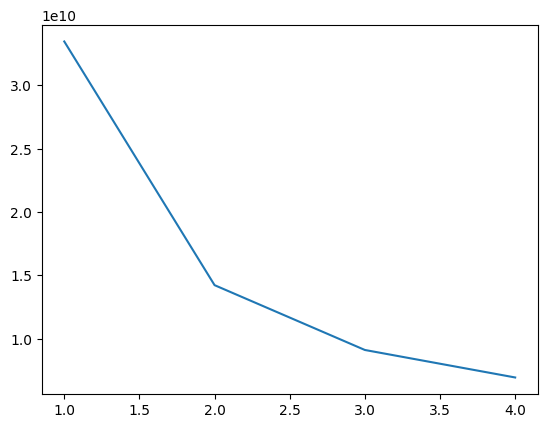

In [16]:
sns.lineplot(x=range(1,5),y=inertia)

# The optimum number of clusters is 3. Lets refit the data on 3 clusters

In [17]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(df.drop(columns=["DATE_TIME","GEOHASH"],axis=1))

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [18]:
df['Cluster']=kmeans.labels_

## Lets View  the places which are clustered 

<Axes: xlabel='Cluster', ylabel='NUMBER_OF_VEHICLES'>

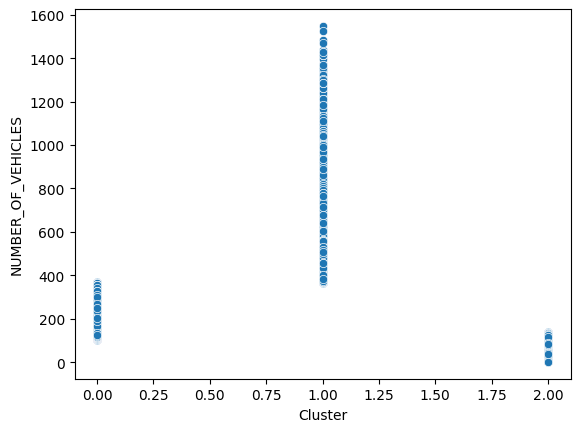

In [19]:
import seaborn as sns
sns.scatterplot(y='NUMBER_OF_VEHICLES',x='Cluster',data=df)

<Axes: xlabel='Cluster', ylabel='MAXIMUM_SPEED'>

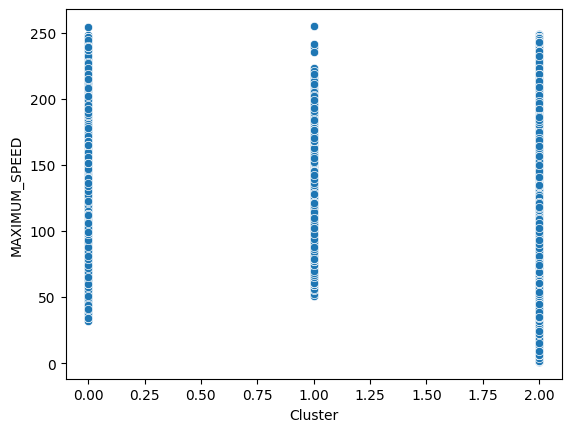

In [20]:
sns.scatterplot(y='MAXIMUM_SPEED',x='Cluster',data=df)

<Axes: xlabel='Cluster', ylabel='AVERAGE_SPEED'>

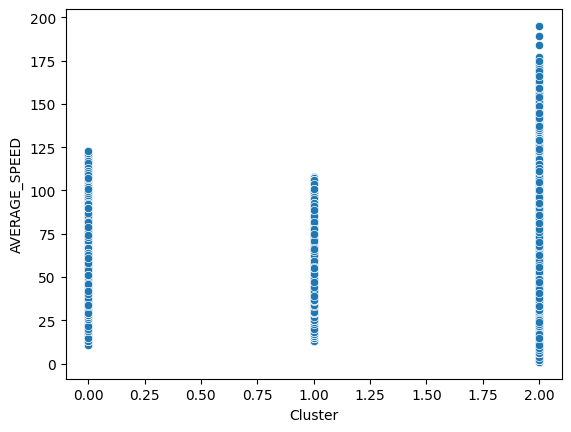

In [21]:
sns.scatterplot(y='AVERAGE_SPEED',x='Cluster',data=df)

<Axes: xlabel='Cluster', ylabel='MINIMUM_SPEED'>

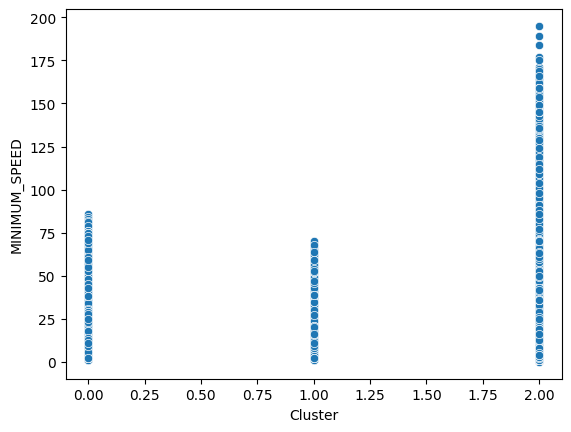

In [22]:
sns.scatterplot(y='MINIMUM_SPEED',x='Cluster',data=df)

## CONCLUSION 

Our dataset has been finely divided into clusters . Each cluster has its own value of Average Speed , No. of Vehicles and Speed. 